In [1]:
# display inline plots
%matplotlib inline

# import libraries for numerical and scientific computing
import numpy as np
import scipy as sp

# import matplotlib for plotting
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import pandas for data wrangling and munging
import pandas as pd

# set some options for better view
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# import plotting library built on top of matplotlib
import seaborn as sns

# set some settings related to style of plots that will render
sns.set_style("whitegrid")
sns.set_context("poster")

import warnings
warnings.filterwarnings('ignore')

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [204]:
# load training and test examples

loan_train = pd.read_csv('./data/train_u6lujuX.csv', index_col='Loan_ID')
loan_test = pd.read_csv('./data/test_Y3wMUE5.csv', index_col='Loan_ID')

In [205]:
# take a sneak peak at some of the examples
loan_train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y


In [206]:
# number of training examples
print 'Number of training examples {0} '.format(loan_train.shape[0])

Number of training examples 614 


In [207]:
# number of test examples
print 'Number of test examples {0} '.format(loan_test.shape[0])

Number of test examples 367 


In [208]:
# class distribution
loan_train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

** Most of the applications for loan were accepted. **

## Missing values

In [209]:
loan_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

** There are many features with missing values **

## Importing external scripts

In [210]:
%run scripts/helper.py
%run scripts/model.py
%run scripts/data.py

## Mapping Ordinal Features

In [211]:
loan_train['Gender'] = (loan_train.Gender=='Female')*1
loan_test['Gender'] = (loan_test.Gender=='Female')*1

In [212]:
loan_train['Married'] = (loan_train.Married=='No')*1
loan_test['Married'] = (loan_test.Married=='No')*1

In [213]:
loan_train['Self_Employed'] = (loan_train.Self_Employed=='Yes')*1
loan_test['Self_Employed'] = (loan_test.Self_Employed=='Yes')*1

In [214]:
loan_train['LoanAmount'] = loan_train.LoanAmount.fillna(loan_train.LoanAmount.mean())
loan_test['LoanAmount'] = loan_test.LoanAmount.fillna(loan_test.LoanAmount.mean())

In [215]:
loan_train['Loan_Amount_Term'] = loan_train.Loan_Amount_Term.fillna(loan_train.Loan_Amount_Term.mean())
loan_test['Loan_Amount_Term'] = loan_test.Loan_Amount_Term.fillna(loan_test.Loan_Amount_Term.mean())

In [216]:
loan_train['Credit_History'] = loan_train.Credit_History.fillna(1)
loan_test['Credit_History'] = loan_test.Credit_History.fillna(1)

In [217]:
education_mapping = {'Graduate': 1, 'Not Graduate': 2}

loan_train['Education'] = loan_train.Education.map(education_mapping)
loan_test['Education'] = loan_test.Education.map(education_mapping)

In [218]:
property_area_mapping = {'Urban': 1, 'Rural': 2, 'Semiurban': 3}

loan_train['Property_Area'] = loan_train.Property_Area.map(property_area_mapping)
loan_test['Property_Area'] = loan_test.Property_Area.map(property_area_mapping)

## Histogram of Applicant's Income

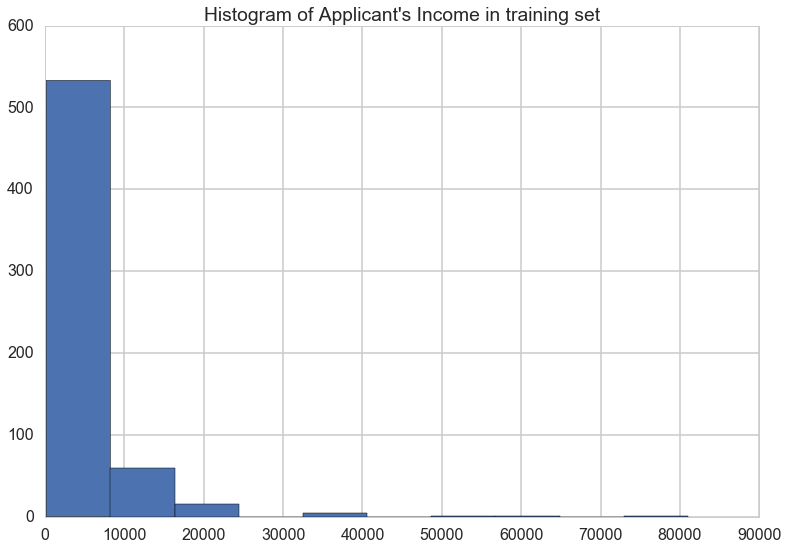

In [219]:
loan_train.ApplicantIncome.hist()
plt.title('Histogram of Applicant\'s Income in training set');

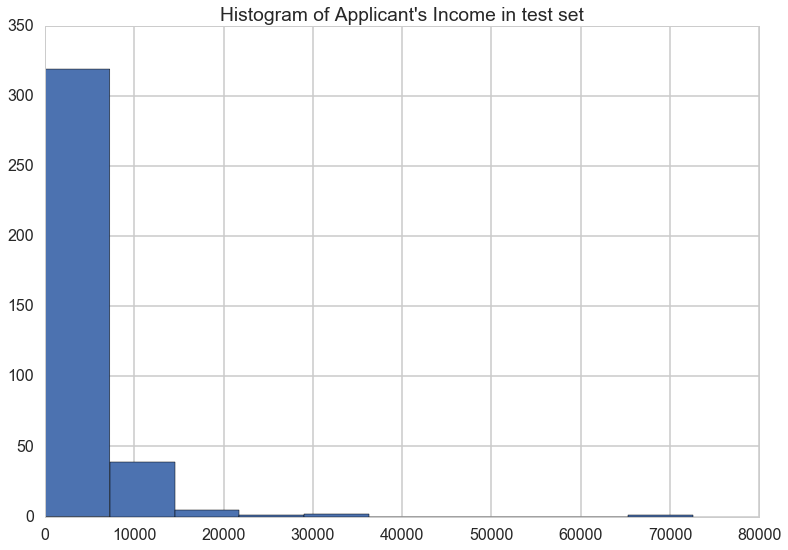

In [220]:
loan_test.ApplicantIncome.hist()
plt.title('Histogram of Applicant\'s Income in test set');

** Heavy tail is evident, it will be benefited from log transformation **

In [221]:
loan_train['ApplicantIncome'] = np.log10(loan_train.ApplicantIncome + 1)
loan_test['ApplicantIncome'] = np.log10(loan_test.ApplicantIncome + 1)

## Histogram of co-applicant's income

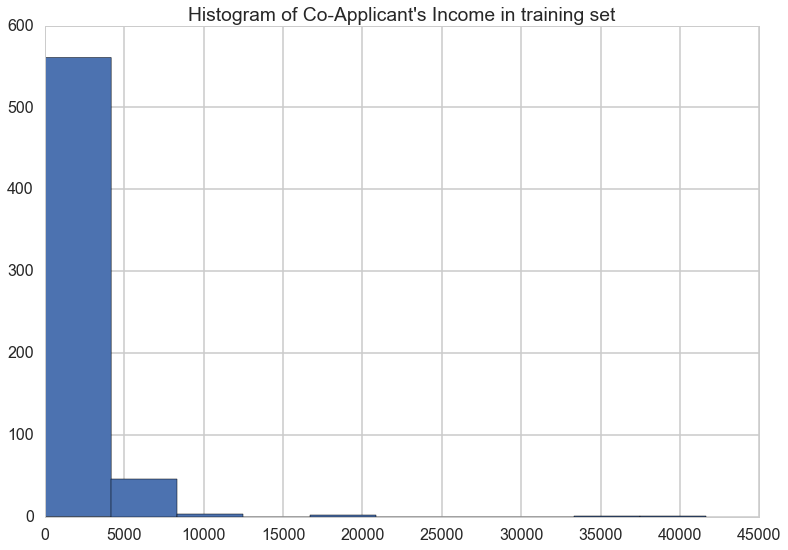

In [222]:
loan_train.CoapplicantIncome.hist()
plt.title('Histogram of Co-Applicant\'s Income in training set');

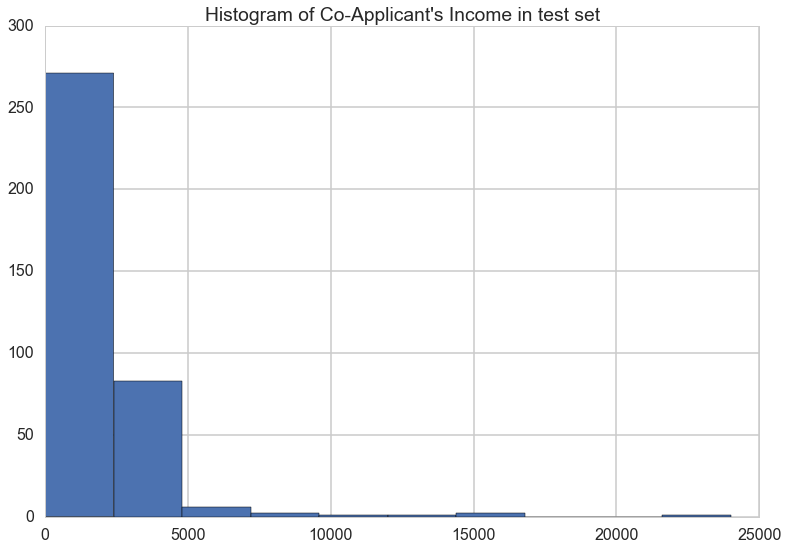

In [223]:
loan_test.CoapplicantIncome.hist()
plt.title('Histogram of Co-Applicant\'s Income in test set');

In [224]:
loan_train['CoapplicantIncome'] = np.log10(loan_train.CoapplicantIncome + 1)
loan_test['CoapplicantIncome'] = np.log10(loan_test.CoapplicantIncome + 1)

In [225]:
loan_train['LoanAmount'] = np.log10(loan_train.LoanAmount + 1)
loan_test['LoanAmount'] = np.log10(loan_test.LoanAmount + 1)

In [226]:
loan_train['Loan_Amount_Term'] = np.log10(loan_train.Loan_Amount_Term + 1)
loan_test['Loan_Amount_Term'] = np.log10(loan_test.Loan_Amount_Term + 1)

## Prepare dataset

In [227]:
features = loan_train.columns.drop(['Dependents', 'Loan_Status'])

train_target = loan_train.Loan_Status
loan_train = loan_train[features]

loan_test = loan_test[features]

## Partition a dataset into training and test sets

In [228]:
X_train, X_test, y_train, y_test = train_test_split(loan_train, train_target, test_size=0.2, random_state=0)

In [229]:
print X_train.shape, X_test.shape

(491, 10) (123, 10)


## Bringing features on the same scale

In [230]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Selecting meaningful features

In [231]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print 'Training accuracy:', lr.score(X_train_std, y_train)
print 'Test accuracy:', lr.score(X_test_std, y_test)

Training accuracy: 0.804480651731
Test accuracy: 0.829268292683


In [232]:
lr.intercept_

array([ 0.62045001])

In [233]:
lr.coef_[0]

array([ 0.        , -0.04517908, -0.03779548,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.18774032,  0.07881714])

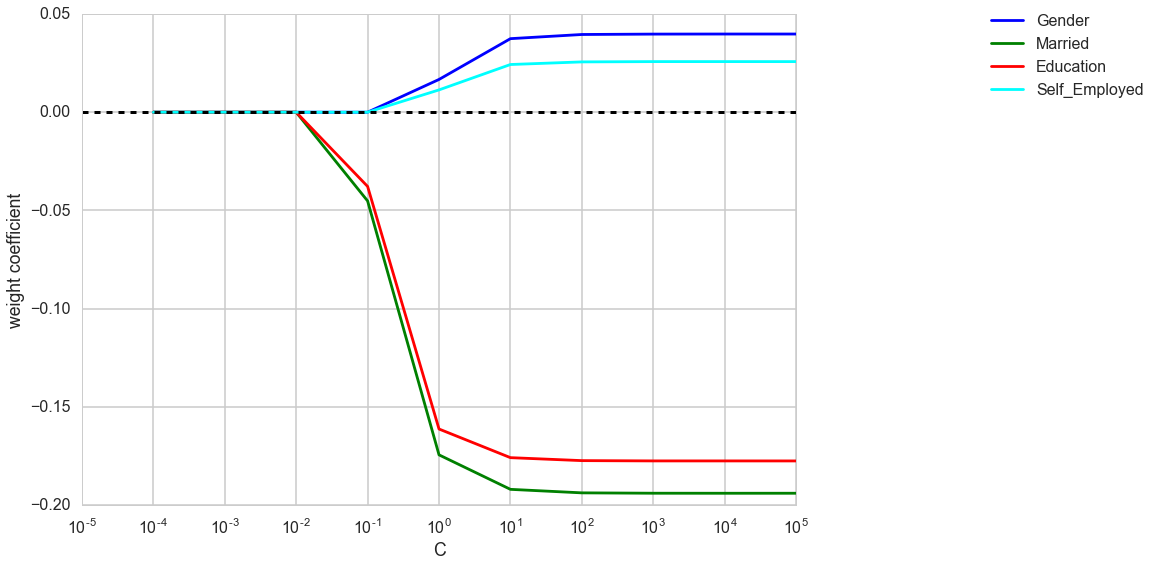

In [234]:
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan']

weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=loan_train.columns[column],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [235]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

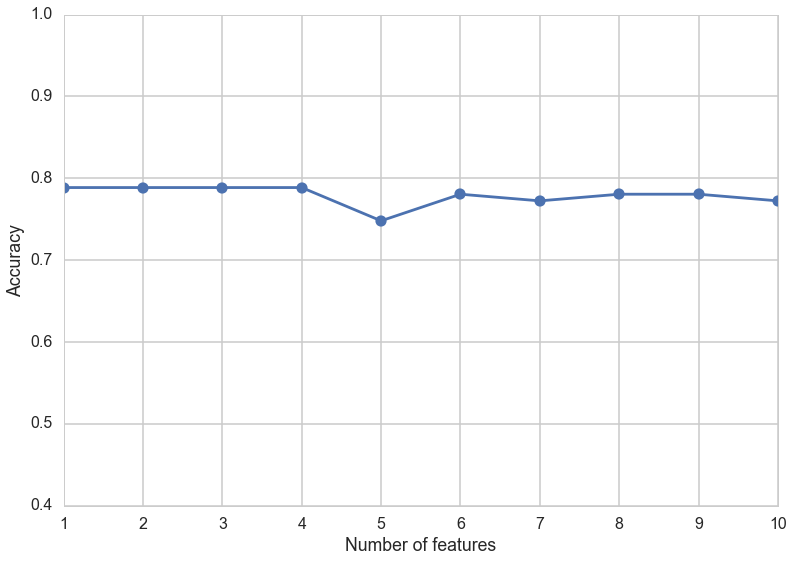

In [286]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.4, 1.0])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show();

In [237]:
k4 = list(sbs.subsets_[6])
print loan_train.columns[k4]

Index([u'ApplicantIncome', u'CoapplicantIncome', u'Credit_History', u'Property_Area'], dtype='object')


In [238]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

('Training accuracy:', 0.80651731160896134)
('Test accuracy:', 0.81300813008130079)


In [239]:
knn.fit(X_train_std[:, k4], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k4], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k4], y_test))

('Training accuracy:', 0.83706720977596738)
('Test accuracy:', 0.80487804878048785)


## Assesing Feature Importance with Random Forests

 1) Credit_History                 0.266003
 2) ApplicantIncome                0.224651
 3) LoanAmount                     0.205484
 4) CoapplicantIncome              0.121433
 5) Property_Area                  0.050427
 6) Loan_Amount_Term               0.043221
 7) Married                        0.026753
 8) Education                      0.023485
 9) Self_Employed                  0.020507
10) Gender                         0.018037


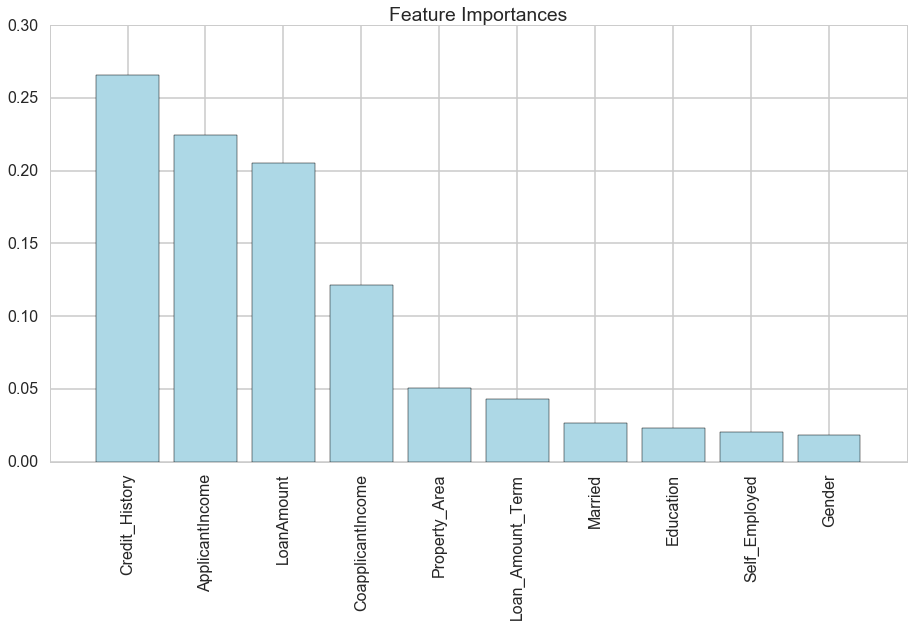

In [259]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = loan_train.columns

forest = RandomForestClassifier(n_estimators=500,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [284]:
feat = ['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']

forest = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion='entropy', min_samples_leaf=5, min_weight_fraction_leaf=.1)
forest.fit(X_train[feat], y_train)

print('Training accuracy:', forest.score(X_train[feat], y_train))
print('Test accuracy:', forest.score(X_test[feat], y_test))

('Training accuracy:', 0.8044806517311609)
('Test accuracy:', 0.82926829268292679)


## Model Building

In [285]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(loan_train, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='distance')

In [268]:
predictions_knn = knn.predict(loan_test)

In [269]:
forest = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion='entropy', min_samples_leaf=5)
forest.fit(loan_train, train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [270]:
predictions_forest = forest.predict(loan_test)

In [273]:
forest = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion='gini', min_samples_leaf=5)
forest.fit(loan_train, train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [274]:
predictions_forest_gini = forest.predict(loan_test)

## Majority Voting

In [275]:
from collections import Counter
import numpy as np

def majority_voting(preds):
    """
    Given an array of predictions from various classifiers
    return single array with ensemble of predictions based on
    simple majority voting
    
    Input: list of list [[y1, y2, y3, ..], [y1, y2, y3, ...], ..] 
    Output: final prediction [y1, y2, y3, ..]
    """
    length = [len(pred) for pred in preds]
    
    if len(set(length)) != 1:
        raise ValueError('Predictions must be of the same length')
    
    pred_matrix = np.matrix(preds)
    ensemble_preds = []
    
    for i in range(len(preds[0])):
        pred_column = np.array(pred_matrix[:, i]).ravel()
        common_pred = Counter(pred_column)
        most_common = common_pred.most_common()[0][0]
        
        ensemble_preds.append(most_common)
    
    return ensemble_preds

In [276]:
ensemble_preds = majority_voting([predictions_knn, predictions_forest, predictions_forest_gini])

In [278]:
create_submissions(loan_test.index.values, ensemble_preds, 'ensemble_preds.csv')